## Finding the most influential politicians of the 150 members of the Belgian federal parliament on X

## Install and Import Libraries

In [ ]:
!pip install gqlalchemy
!pip install nltk
!pip install pandas

In [2]:
from gqlalchemy import Memgraph

# Connect to Memgraph using the actual server address and port
memgraph = Memgraph("127.0.0.1", 7687)


## Count of Party Members

In [3]:
import pandas as pd
#number of party members
results = memgraph.execute_and_fetch(
    """
    MATCH (p:Party)<-[:MEMBER_OF]-(u:User)
    RETURN p.ident AS PartyName, COUNT(u) AS MemberCount
    ORDER BY MemberCount DESC;
    """
)
partyMembNum = pd.DataFrame([result for result in results])
partyMembNum


,PartyName,MemberCount
0,N-VA,21
1,Ecolo-Groen,19
2,PS,19
3,VB,17
4,MR,11
5,Open Vld,11
6,cd&v,11
7,PVDA-PTB,11
8,Vooruit,8
9,Les Engagés,5


## Tweet Language Statistics by Party

In [4]:
#get tweet language statistics per party
results = memgraph.execute_and_fetch(
    """
    MATCH (p:Party)<-[:MEMBER_OF]-(u:User)-[:POSTED]->(t:Tweet)
    WHERE p.ident IN ['N-VA', 'Ecolo-Groen', 'PS', 'VB', 'MR', 'Open Vld', 'cd&v', 'PVDA-PTB', 'Vooruit', 'Les Engagés', 'DéFI', 'ONAFH']
    RETURN p.ident AS PartyIdent, t.lang AS Language, COUNT(t) AS TweetCount
    ORDER BY PartyIdent, TweetCount DESC;
    """
)
partyTweeLang = pd.DataFrame([result for result in results])
partyTweeLang


,PartyIdent,Language,TweetCount
0,DéFI,fr,832
1,DéFI,zxx,15
2,DéFI,qme,9
3,DéFI,en,2
4,DéFI,qam,1
...,...,...,...
152,cd&v,qme,4
153,cd&v,fr,3
154,cd&v,de,2
155,cd&v,art,1


## Politician with the Most Comments

In [14]:
# Politician with the most comments
query = """
MATCH (u:User)-[:MEMBER_OF]->(p:Party)
MATCH (u)-[:POSTED]->(t:Tweet)
WHERE t.is_quote IS NULL OR t.is_quote = false
MATCH (t)<-[:REPLY_TO]-(reply:Tweet)
RETURN u.name AS UserName, p.ident AS PartyName, COUNT(reply) AS ReplyCount
ORDER BY ReplyCount DESC
"""

results = memgraph.execute_and_fetch(query)

import pandas as pd

comtReced = pd.DataFrame([result for result in results])
comtReced.head(20)


,UserName,PartyName,ReplyCount
0,Theo Francken MP,N-VA,21744
1,Darya Safai MP,N-VA,7877
2,Egbert Lachaert,Open Vld,6130
3,Joris Vandenbroucke,Vooruit,5612
4,Michael Freilich,N-VA,5248
5,Raoul Hedebouw,PVDA-PTB,5050
6,Peter Mertens MP,PVDA-PTB,4707
7,Melissa Depraetere,Vooruit,3766
8,Sander Loones,N-VA,3371
9,Wouter Beke,cd&v,2654


## Politician with the Most Likes

In [6]:
# politician with the most likes
query = """
MATCH (u:User)-[:MEMBER_OF]->(p:Party)
MATCH (u)-[:POSTED]->(t:Tweet)
WHERE t.is_quote IS NULL OR t.is_quote = false
RETURN u.name AS UserName, p.ident AS PartyName, SUM(t.favorite_count) AS LikeCount
ORDER BY LikeCount DESC
"""

results = memgraph.execute_and_fetch(query)

likeReced = pd.DataFrame([result for result in results])
likeReced.head(20)


,UserName,PartyName,LikeCount
0,Darya Safai MP,N-VA,176040
1,Theo Francken MP,N-VA,119431
2,Sander Loones,N-VA,31969
3,Michael Freilich,N-VA,23879
4,Peter De Roover,N-VA,19241
5,kathleen depoorter,N-VA,17699
6,Tomas Roggeman,N-VA,16706
7,Raoul Hedebouw,PVDA-PTB,13599
8,Peter Mertens MP,PVDA-PTB,10901
9,Denis Ducarme,MR,10795


## Politician with the Most Retweets

In [7]:
# politician with the most retweets
query = """
MATCH (u:User)-[:MEMBER_OF]->(p:Party)
MATCH (u)-[:POSTED]->(t:Tweet)
WHERE t.is_quote IS NULL OR t.is_quote = false
RETURN u.name AS UserName, p.ident AS PartyName, SUM(t.retweet_count) AS RetweetCount
ORDER BY RetweetCount DESC
"""

results = memgraph.execute_and_fetch(query)

retweetReced = pd.DataFrame([result for result in results])
retweetReced.head(20)


,UserName,PartyName,RetweetCount
0,Eric THIEBAUT,PS,874675
1,Theo Francken MP,N-VA,190774
2,Meryame Kitir,Vooruit,170068
3,Joris De Vriendt,VB,136873
4,Darya Safai MP,N-VA,128764
5,Georges Dallemagne,Les Engagés,56293
6,Gilles Vanden Burre,Ecolo-Groen,34934
7,Eva Platteau,Ecolo-Groen,31015
8,Samuel Cogolati,Ecolo-Groen,29738
9,Ben Achour Malik,PS,28893


## Mutual Mention Count

In [8]:
#analyse mutual mention count
query = """
MATCH (u1:User)-[:MEMBER_OF]->(p1:Party),
      (u2:User)-[:MEMBER_OF]->(p2:Party),
      (u1)-[:POSTED]->(t1:Tweet)-[:MENTIONS]->(u2),
      (u2)-[:POSTED]->(t2:Tweet)-[:MENTIONS]->(u1)
RETURN u1.name AS User1, p1.ident AS Party1, u2.name AS User2, p2.ident AS Party2, COUNT(*) AS MutualMentionCount
ORDER BY MutualMentionCount DESC
LIMIT 20
"""

results = memgraph.execute_and_fetch(query)

import pandas as pd

mutual_mention_relations = pd.DataFrame([result for result in results])
mutual_mention_relations.head(20)


,User1,Party1,User2,Party2,MutualMentionCount
0,Sophie Rohonyi,DéFI,François De Smet,DéFI,2016
1,François De Smet,DéFI,Sophie Rohonyi,DéFI,2016
2,Raoul Hedebouw,PVDA-PTB,Peter Mertens MP,PVDA-PTB,646
3,Peter Mertens MP,PVDA-PTB,Raoul Hedebouw,PVDA-PTB,646
4,Sander Loones,N-VA,Theo Francken MP,N-VA,352
5,Theo Francken MP,N-VA,Sander Loones,N-VA,352
6,Raoul Hedebouw,PVDA-PTB,Sofie Merckx,PVDA-PTB,324
7,Sofie Merckx,PVDA-PTB,Raoul Hedebouw,PVDA-PTB,324
8,Darya Safai MP,N-VA,Theo Francken MP,N-VA,80
9,Theo Francken MP,N-VA,Darya Safai MP,N-VA,80


# Analyzing Theo Francken MP

## Displaying the contents of tweets

In [18]:
#Analyze Theo Francken MP
query = """
MATCH (u:User {name: 'Theo Francken MP'})-[:POSTED]->(t:Tweet)
WHERE t.created_at >= '2024-01-01' AND t.created_at <= '2024-05-31'
WITH t, substring(t.created_at, 0, 7) AS month
RETURN month, collect(t.full_text) AS tweets, sum(toInteger(t.retweet_count)) AS total_retweets, sum(toInteger(t.reply_count)) AS total_comments, sum(toInteger(t.favorite_count)) AS total_likes
ORDER BY month
"""

results = memgraph.execute_and_fetch(query)
# print results
#for result in results:
#    print(result)    #To make the code more readable, we commented out the results, so if you want to read his tweets, just uncomment them.


## Making the contents more readable

In [17]:
# Re-run the query and fetch results
results = memgraph.execute_and_fetch(query)

# Initialize a list to store the results
data = []
for result in results:
    data.append(result)

# Print the first result to inspect the structure
if data:
    print("First result:", data[0])
else:
    print("No data returned by the query")

# Create a DataFrame
df = pd.DataFrame(data)

# Check if the DataFrame contains the 'month' column
if 'month' in df.columns:
    # Convert the 'month' column to datetime format
    df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
    print(df)
else:
    print("The DataFrame does not contain the 'month' column")
    

First result: {'UserName': 'Theo Francken MP', 'PartyName': 'N-VA', 'ReplyCount': 21744}
The DataFrame does not contain the 'month' column


## Cleaning the Text and Visualizing Text Data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qinpe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qinpe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


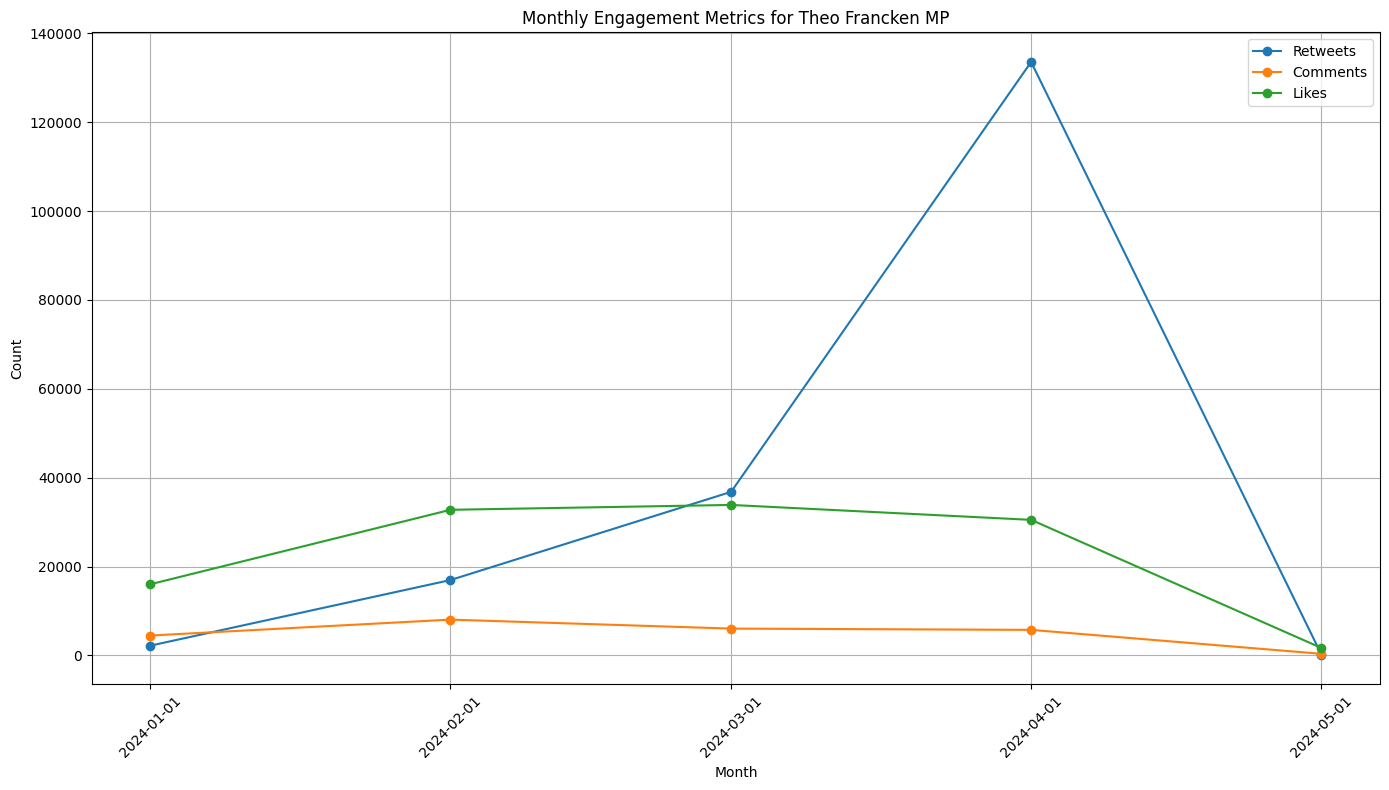

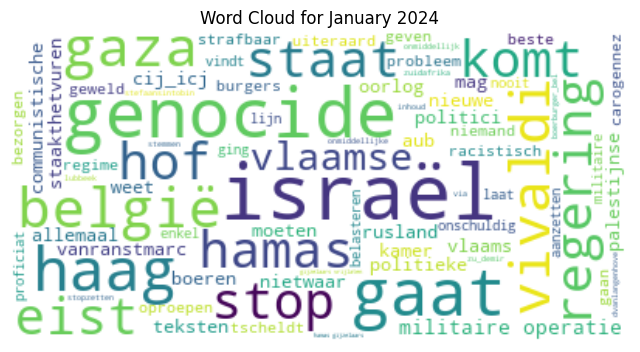

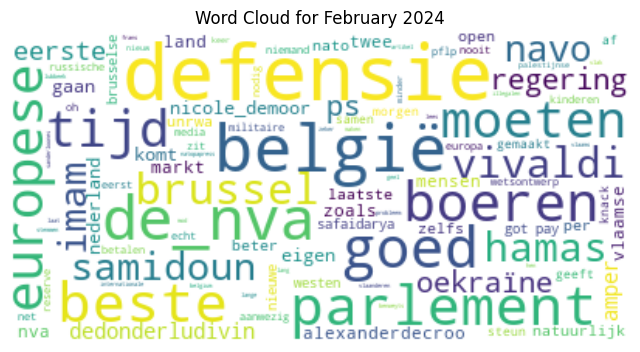

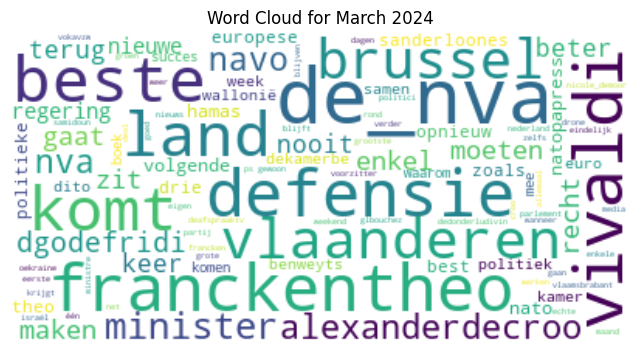

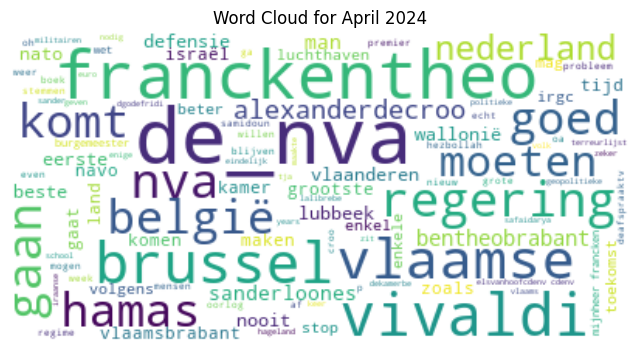

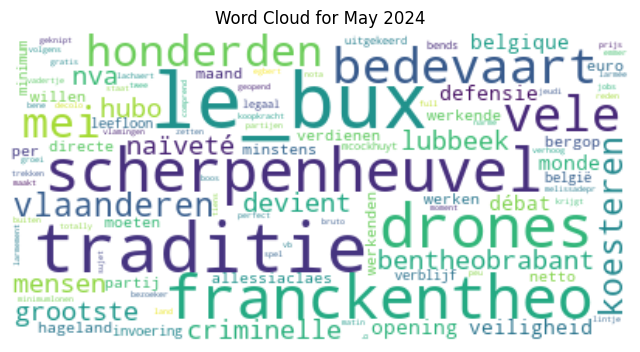

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

# Download stopwords list
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))  # Add English stopwords
stop_words.update(stopwords.words('dutch'))   # Add Dutch stopwords
stop_words.update(stopwords.words('french'))  # Add French stopwords

# Add more Dutch stopwords
dutch_stopwords = ["de", "en", "van", "ik", "te", "dat", "die", "in", "een", "hij", "het", "niet", "zijn", "is", "was", "op",
                   "aan", "met", "als", "voor", "had", "er", "maar", "om", "hem", "dan", "zou", "of", "wat", "mijn", "men",
                   "dit", "zo", "door", "over", "ze", "zich", "bij", "ook", "tot", "je", "mij", "uit", "der", "daar", "haar",
                   "naar", "heb", "hoe", "heeft", "hebben", "deze", "u", "want", "nog", "zal", "me", "zij", "nu", "ge", "geen",
                   "omdat", "iets", "worden", "toch", "al", "waren", "veel", "meer", "doen", "toen", "moet", "ben", "zonder",
                   "kan", "hun", "dus", "alles", "onder", "ja", "eens", "hier", "wie", "werd", "altijd", "doch", "wordt", "wezen",
                   "kunnen", "ons", "zelf", "tegen", "na", "reeds", "wil", "kon", "niets", "uw", "iemand", "geweest", "andere","onze","alle","elke",
                   "jaren", "wel", "den", "dag", "jaar", "velen", "neen","helemaal","jullie","vandaag","heel","hele","doet","bent","waar","wij"]

# Add more French stopwords
french_stopwords = ["au", "aux", "avec", "ce", "ces", "dans", "de", "des", "du", "elle", "en", "et", "eux", "il", "je", "la", "le",
                    "leur", "lui", "ma", "mais", "me", "même", "mes", "moi", "mon", "ne", "nos", "notre", "nous", "on", "ou", "par",
                    "pas", "pour", "qu", "que", "qui", "sa", "se", "ses", "son", "sur", "ta", "te", "tes", "toi", "ton", "tu", "un",
                    "une", "vos", "votre", "vous", "c", "d", "j", "l", "à", "m", "n", "s", "t", "y", "été", "étée", "étées", "étés",
                    "étant", "suis", "es", "est", "sommes", "êtes", "sont", "serai", "seras", "sera", "serons", "serez", "seront",
                    "serais", "serait", "serions", "seriez", "seraient", "étais", "était", "étions", "étiez", "étaient", "fus",
                    "fut", "fûmes", "fûtes", "furent", "sois", "soit", "soyons", "soyez", "soient", "fusse", "fusses", "fût",
                    "fussions", "fussiez", "fussent"]

# Update stopwords
stop_words.update(dutch_stopwords)
stop_words.update(french_stopwords)

additional_stopwords = {"rt", "co"}  # Add additional stopwords
stop_words.update(additional_stopwords)

# Define the cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Clean tweet text and convert to lowercase
df['cleaned_tweets'] = df['tweets'].apply(lambda tweets: [clean_text(tweet.lower()) for tweet in tweets])
df['all_cleaned_words'] = df['cleaned_tweets'].apply(lambda tweets: [word for tweet in tweets for word in tweet])
df['top_keywords'] = df['all_cleaned_words'].apply(lambda words: [item[0] for item in Counter(words).most_common(10)])

# Visualize retweets, comments, and likes count
plt.figure(figsize=(14, 8))
plt.plot(df['month'], df['total_retweets'], marker='o', label='Retweets')
plt.plot(df['month'], df['total_comments'], marker='o', label='Comments')
plt.plot(df['month'], df['total_likes'], marker='o', label='Likes')
plt.title('Monthly Engagement Metrics for Theo Francken MP')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(df['month'], rotation=45)
plt.tight_layout()
plt.show()

# Visualize word cloud for each month
for index, row in df.iterrows():
    text = ' '.join(row['all_cleaned_words'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f'Word Cloud for {row["month"].strftime("%B %Y")}')
    plt.show()
